# CC3001 2022-2 - Tarea 5: `Min_Max_Heap` -- Leonardo Rikhardsson


## Profesores: Nelson Baloian, Jérémy Barbay, Benjamín Bustos, Patricio Poblete

Según las condiciones de su sección, pueden entregar un link a su tarea en `colab` o subir un archivo en el formato Jupyter NoteBook (`.ipynb`). Puede crear todas las funciones auxiliares que requiera para implementar las funciones solicitadas. Para programar las funciones debe usar los *array* de *numpy*. Los únicos métodos de los objetos de tipo *array* que puede utilizar en su solución son los siguientes:

- El método *array* para crear un arreglo.
- Los métodos *zeros*, *ones* y *full* para inicializar un *array*.

No se puede utilizar ningún otro método disponible en módulos de Python.


# El Problema


Se trata de extender una implementación de un `Max_Heap` (tal como, por ejemplo, la de los [apuntes](https://colab.research.google.com/github/ivansipiran/AED-Apuntes/blob/main/05_Pilas_Colas_y_Colas_de_Prioridad.ipynb#scrollTo=Implementaci_n_usando_un_Heap), o la implementación [abajo](https://colab.research.google.com/drive/1cy50yuJZ6leVGdJg2iXNZV6SHtYTXisu#scrollTo=Implementaci_n_de_un_Max_Heap_que_dibujo_los_estados_intermedios) la cual permite dibujar el árbol correspondiendo al heap) en un `Min_Max_Heap` (tal como está definido, por ejemplo, en [Wikipedia](https://en.wikipedia.org/wiki/Min-max_heap)), que soporta tanto `extract_min` como `extract_max` en tiempo logarítmico en la cantidad de elementos en el `Min_Max_Heap`.

## Descripción formal de un `Min_Max_Heap`


Un `Min_Max_Heap` de $n$ elementos es muy similar a un `Min_Heap` o un `Max_Heap` en el sentido que es un árbol binario balanceado perfecto representado en las $n$ primeras posiciones de un arreglo. La diferencia con un `Min_Heap` o un `Max_Heap` es que para los nodos cuya distancia (largo del camino) a la raíz es par (e.g., $0,2,4,\ldots$) aplican las reglas de un `Min_Heap` (i.e., tiene valor menor o igual a los de todos sus descendientes), mientras que para los nodos cuya distancia a la raíz es impar (e.g., ($1,3,5,\ldots$) aplican las reglas de un `Max_Heap` (i.e., tiene valor mayor o igual a los de todos sus descendientes).



Para insertar un elemento en un `Min_Max_Heap`, se inserta al final del arreglo y se compara con el valor de su nodo "*padre*":

- si es inferior al valor de su nodo padre, entonces es inferior a todos los valores de nodos `max` (i.e., a distancia impar de la raíz), y se deben considerar únicamente los nodos ancestros de tipo `min` (i.e., a distancia par de la raíz) para *corregir* el `Min_Max_Heap`, usando el proceso de un `Min_Heap`; por el contrario,

- si es superior al valor de su nodo padre, entonces es superior a todos los valores de nodos `min` (i.e., a distancia par de la raíz), y se deben considerar únicamente los nodos ancestros de tipo `max` (i.e., a distancia impar de la raíz) para *corregir* el `Min_Max_Heap`, usando el proceso de un `Max_Heap`.



Para extraer el mínimo de un `Min_Max_Heap`, se saca la raíz, se reemplaza por el último elemento del arreglo, y se procede a *corregir* el `Min_Max_Heap` de manera simétrica al proceso de la inserción.  Para extraer el máximo de un `Min_Max_Heap`, se saca el hijo mayor de la raíz, se reemplaza dicho valor por el último elemento del arreglo, y se procede a *corregir* el `Min_Max_Heap` de manera simétrica al proceso de la inserción.


Para corregir un `Min_Max_Heap` tomaremos el caso en que el nodo actual está en un nivel min (par), el caso para un nodo en nivel max es análogo.  Luego de reemplazar la raíz se debe comparar el nodo que se insertó con sus hijo y los hijos de sus hijos y tomar el mínimo entre estos siete elementos, luego, tenemos tres casos:
1. El mínimo es el nodo actual, en ese caso el heap ya está balanceado y no hay que realizar más cambios.
1. El mínimo es un hijo del nodo actual, en este caso se debe hacer swap entre el nodo y el hijo, y ahí termina la corrección.
1. El mínimo es un nieto del nodo actual, en este caso se debe hacer swap entre el nodo y el nieto, y corregir recursivamente desde el nieto.


# Parte 1: `Min_Max_Heap_es_valido`


Antes de comenzar a programar, estudie bien la definición de un `Min_Max_Heap` y luego defina un metodo `Min_Max_Heap_es_valido` que, dado un arreglo de valores, retorna `True` si corresponde a un `Min_Max_Heap` y `False` sino.

In [ ]:
import numpy as np

def Min_Max_Heap_es_valido(arreglo):
  """Dado un arreglo de valores, retorna `True` si corresponde a un `Min_Max_Heap` y `False` sino."""
  # Su codigo aqui
  n = len(arreglo)
  for i in range(0,n):
    raiz = int(np.log2(i+1))
    if raiz%2==0:
      if n > 2*i+1:
        if arreglo[i] >= arreglo[2*i+1]:
          return False
      if n > 2*i+2:
        if arreglo[i] >= arreglo[2*i+2]:
          return False
    elif raiz%2!=0:
      if n > 2*i+1:
        if arreglo[i] < arreglo[2*i+1]:
          return False
      if n > 2*i+2:
        if arreglo[i] < arreglo[2*i+2]:
          return False
  return True

a = np.array([1,2,3])
assert Min_Max_Heap_es_valido(a) == True

a = np.array([1,2,3,4,5,6,7])
assert Min_Max_Heap_es_valido(a) == False

a = np.array([1,6,7,4,5,2,3])
assert Min_Max_Heap_es_valido(a) == True

# Mas pruebas de caso aqui.
a = np.array([1,6,7,4,5,2,3,1])
assert Min_Max_Heap_es_valido(a) == False

a = np.array([1,6,7,4,5,2,3,8])
assert Min_Max_Heap_es_valido(a) == True

a = np.array([1,6,7,4,5,2,3,8,9,8,8,8,8,8,8,10])
assert Min_Max_Heap_es_valido(a) == False

a = np.array([1])
assert Min_Max_Heap_es_valido(a) == True

a = np.array([2,1])
assert Min_Max_Heap_es_valido(a) == False

a = np.array([1,2,3])
assert Min_Max_Heap_es_valido(a) == True

a = np.array([1,5,4,3,2])
assert Min_Max_Heap_es_valido(a) == True

a = np.array([3,5,4,1,2])
assert Min_Max_Heap_es_valido(a) == False

a = np.array([1,35,32,6,3,4,5,20,21,22,23,24,25,26,27,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,2])
assert Min_Max_Heap_es_valido(a) == False

a = np.array([1,35,32,6,3,4,5,20,21,22,23,24,25,26,27,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,8])
assert Min_Max_Heap_es_valido(a) == True

a = np.array([1,25,22,3,6,7,8,27,28,29,30])
assert Min_Max_Heap_es_valido(a) == False

a = np.array([3,2,1])
assert Min_Max_Heap_es_valido(a) == False

a = np.array([2,3,1])
assert Min_Max_Heap_es_valido(a) == False

a = np.array([1,2,3,4,5,6,7])
assert Min_Max_Heap_es_valido(a) == False

a = np.array([1,6,7,4,5,2,3])
assert Min_Max_Heap_es_valido(a) == True

a = np.array([1,10,7,4,5,2,3,6,8,9])
assert Min_Max_Heap_es_valido(a) == True

a = np.array([1,10,8,5,3,2,4,9,7,6])
assert Min_Max_Heap_es_valido(a) == True

a = np.array([8,71,41,31,10,11,16,46,51,31,21,13]) #el de Wikipedia
assert Min_Max_Heap_es_valido(a) == True

a = np.array([1, 213, 237, 2, 4, 19, 35, 184, 159, 157, 205, 154, 230, 207, 84, 134, 18, 5, 31, 26, 64, 38, 29, 57, 21, 141, 70, 182, 107, 79, 58, 160, 148, 22, 149, 90, 6, 137, 120, 112, 102, 115, 142, 165, 43, 149, 46, 98, 90, 66]) #el de Wikipedia
assert Min_Max_Heap_es_valido(a) == True

AssertionError: ignored

Queria probar de otra forma, pero por tiempo no me salio

In [ ]:
# def Min_Max_Heap_es_valido(arreglo):
#   """Dado un arreglo de valores, retorna `True` si corresponde a un `Min_Max_Heap` y `False` sino."""
#   # Su codigo aqui
#   n = len(arreglo)
#   for i in range(1,n):
#     #Para el caso de que sea mayor al padre
#     #arreglo[i] >= arreglo[int((n - 1) // 2)]
#     if i >= int((n - 1) // 2):
#         return True
#     #Si es mayor a los hijos
#     if arreglo[i] >= arreglo[2 * i + 1] and arreglo[i] >= arreglo[2 * i + 2]:
#         return True
#     else:
#         return False

# Parte 2: `Min_Max_Heap`



A continuación implemente su solución como una clase `Min_Max_Heap` con las operaciones `insert`, `extract_max`, `extract_min`. Ejecute las pruebas señaladas más abajo y agregue otras pruebas inventadas por usted.

In [ ]:
from IPython.core.display import JSON
import numpy as np

class Min_Max_Heap:
    def __init__(self,maxn=100):
        self.a=np.zeros(maxn)
        self.n=0
    def insert(self,x):
        # Su implementación aquí
        assert self.n<len(self.a)
        self.a[self.n]=x
        trepar(self.a,self.n)
        self.n+=1

    def extract_max(self): # A MODFICAR!
        # Su implementación aquí
        assert self.n>0
        if self.n == 1:
          return self.a[0]
        elif self.n == 2:
          return self.a[1]
        else:
          if self.a[1] > self.a[2]:
            i = 1
          else:
            i = 2
          x=self.a[i] # esta variable lleva el máximo, el casillero 0 queda vacante
          self.n-=1   # achicamos el heap
          self.a[i]=self.a[self.n] # movemos el elemento sobrante hacia el casillero vacante
          hundirMAX(self.a,0,self.n)
          return x

    def extract_min(self):
        # Su implementación aquí
        assert self.n>0
        x=self.a[0] # esta variable lleva el máximo, el casillero 0 queda vacante
        self.n-=1   # achicamos el heap
        self.a[0]=self.a[self.n] # movemos el elemento sobrante hacia el casillero vacante
        hundirMIN(self.a,0,self.n)
        return x

    def imprimir(self):
        print(self.a[0:self.n])


def trepar(a,j):
    while j >= 1:
      raiz = int(np.log2(j+1))
      if raiz%2==0 and raiz >= 2:
        #Minimo es el nodo actual
        if a[j]>a[(j-1)//2]:
          (a[j],a[(j-1)//2])=(a[(j-1)//2],a[j])
        #Minimo es el nodo hijo o nieto
        if a[j]<a[(j-3)//4]:
          (a[j],a[(j-3)//4])=(a[(j-3)//4],a[j])

      if raiz%2!=0 and raiz >= 2:
        if a[j]<a[(j-1)//2]:
          (a[j],a[(j-1)//2])=(a[(j-1)//2],a[j])
        if a[j]>a[(j-3)//4]:
          (a[j],a[(j-3)//4])=(a[(j-3)//4],a[j])
      j=(j-1)//2

def hundirMAX(a,j,n): # El elemento a[j] se hunde hasta su nivel de prioridad
    while 2*j+1<n: # mientras tenga al menos 1 hijo
        k=2*j+1 # el hijo izquierdo
        if k+1<n and a[k+1]>a[k]: # el hijo derecho existe y es menor
            k+=1
        if a[j]>=a[k]: # tiene mejor prioridad que ambos hijos
            break
        (a[j],a[k])=(a[k],a[j]) # se intercambia con el mayor de los hijos
        j=k # bajamos al lugar del mayor de los hijos

def hundirMIN(a,j,n): # El elemento a[j] se hunde hasta su nivel de prioridad
    while 2*j+1<n: # mientras tenga al menos 1 hijo
        k=2*j+1 # el hijo izquierdo
        if k+1<n and a[k+1]<a[k]: # el hijo derecho existe y es mayor
            k+=1
        if a[j]<=a[k]: # tiene mejor prioridad que ambos hijos
            break
        (a[j],a[k])=(a[k],a[j]) # se intercambia con el mayor de los hijos
        j=k # bajamos al lugar del mayor de los hijos


h = Min_Max_Heap(10)
h.insert(1)
h.insert(10)
h.insert(2)
h.insert(9)
h.insert(3)
h.insert(8)
h.insert(4)
h.insert(7)
h.insert(5)
h.insert(6)
h.imprimir()
assert Min_Max_Heap_es_valido(h.a), h.a
min = h.extract_min()
assert min == 1, min
max = h.extract_max()
assert max == 10, max

h = Min_Max_Heap(10)
h.insert(1)
h.insert(10)
h.insert(2)
h.insert(9)
h.insert(3)
h.insert(8)
h.insert(4)
h.insert(7)
h.insert(5)
h.insert(6)
h.imprimir()
assert Min_Max_Heap_es_valido(h.a), h.a
min = h.extract_min()
h.imprimir()
assert Min_Max_Heap_es_valido(h.a[0:h.n]), h.a[0:h.n]
assert min == 1, min
h.imprimir()
max = h.extract_max()
assert Min_Max_Heap_es_valido(h.a[0:h.n]), h.a[0:h.n]
assert max == 10, max
h.imprimir()

h = Min_Max_Heap(11)
h.insert(1)
h.insert(10)
h.insert(2)
h.insert(9)
h.insert(3)
h.insert(8)
h.insert(4)
h.insert(7)
h.insert(5)
h.insert(6)
h.insert(11)
h.imprimir()
assert Min_Max_Heap_es_valido(h.a), h.a
min = h.extract_min()
h.imprimir()
assert Min_Max_Heap_es_valido(h.a[0:h.n]), h.a[0:h.n]
assert min == 1, min
h.imprimir()
max = h.extract_max()
assert Min_Max_Heap_es_valido(h.a[0:h.n]), h.a[0:h.n]
assert max == 11, max
h.imprimir()

h = Min_Max_Heap(11)
h.insert(11)
h.insert(10)
h.insert(2)
h.insert(9)
h.insert(3)
h.insert(8)
h.insert(4)
h.insert(7)
h.insert(5)
h.insert(6)
h.insert(1)
h.imprimir()
assert Min_Max_Heap_es_valido(h.a), h.a
min = h.extract_min()
h.imprimir()
assert Min_Max_Heap_es_valido(h.a[0:h.n]), h.a[0:h.n]
assert min == 1, min
h.imprimir()
max = h.extract_max()
assert Min_Max_Heap_es_valido(h.a[0:h.n]), h.a[0:h.n]
assert max == 11, max
h.imprimir()

h = Min_Max_Heap(6)
h.insert(1)
h.insert(2)
h.insert(3)
h.insert(4)
h.insert(5)
h.insert(6)
h.imprimir()

assert Min_Max_Heap_es_valido(h.a), h.a
min = h.extract_min()
assert Min_Max_Heap_es_valido(h.a[0:h.n]), h.a[0:h.n]
assert min == 1, min
max = h.extract_max()
assert Min_Max_Heap_es_valido(h.a[0:h.n]), h.a[0:h.n]
assert max == 6, max
min = h.extract_min()
assert Min_Max_Heap_es_valido(h.a[0:h.n]), h.a[0:h.n]
assert min == 2, min
h.imprimir()
max = h.extract_max()
assert Min_Max_Heap_es_valido(h.a[0:h.n]), h.a[0:h.n]
assert max == 5, max
h.imprimir()

h = Min_Max_Heap(1)
h.insert(5)
h.imprimir()

assert Min_Max_Heap_es_valido(h.a), h.a
min = h.extract_min()
assert Min_Max_Heap_es_valido(h.a[0:h.n]), h.a[0:h.n]
assert min == 5, min
h.imprimir()

h = Min_Max_Heap(2)
h.insert(8)
h.insert(3)
h.imprimir()

assert Min_Max_Heap_es_valido(h.a), h.a
min = h.extract_min()
assert Min_Max_Heap_es_valido(h.a[0:h.n]), h.a[0:h.n]
assert min == 3, min
h.imprimir()

h = Min_Max_Heap(2)
h.insert(8)
h.insert(3)
h.imprimir()

assert Min_Max_Heap_es_valido(h.a), h.a
max = h.extract_max()
assert Min_Max_Heap_es_valido(h.a[0:h.n]), h.a[0:h.n]
assert max == 8, max
h.imprimir()

h = Min_Max_Heap(4)
h.insert(10)
h.insert(9)
h.insert(11)
h.insert(6)
h.imprimir()

assert Min_Max_Heap_es_valido(h.a), h.a
min = h.extract_min()
assert Min_Max_Heap_es_valido(h.a[0:h.n]), h.a[0:h.n]
assert min == 6, min
h.imprimir()
max = h.extract_max()
assert Min_Max_Heap_es_valido(h.a[0:h.n]), h.a[0:h.n]
assert max == 11, max
h.imprimir()

[ 1. 10.  8.  5.  3.  2.  4.  9.  7.  6.]
[ 1. 10.  8.  5.  3.  2.  4.  9.  7.  6.]
[ 6. 10.  8.  5.  3.  2.  4.  9.  7.]
[ 6. 10.  8.  5.  3.  2.  4.  9.  7.]


AssertionError: ignored

In [ ]:
j = Min_Max_Heap(9)
j.insert(2)
j.insert(6)
j.insert(1)
j.insert(9)
j.insert(3)
j.insert(8)
j.insert(4)
j.insert(7)
j.insert(5)
j.imprimir()
assert Min_Max_Heap_es_valido(j.a), j.a
min = j.extract_min()
assert min == 1, min
max = j.extract_max()
assert max == 9, max

[1. 9. 8. 5. 3. 2. 4. 7. 6.]


In [ ]:
k = Min_Max_Heap(10)
k.insert(3)
k.insert(4)
k.insert(2)
k.insert(9)
k.insert(10)
k.insert(5)
k.insert(8)
k.insert(1)
k.insert(7)
k.insert(6)
k.imprimir()
assert Min_Max_Heap_es_valido(k.a), k.a
min = k.extract_min()
assert min == 1, min
max = k.extract_max()
assert max == 10, max

[ 1. 10.  8.  2.  6.  3.  5.  4.  7.  9.]


# Para los curiosos

## Implementación de un `Max_Heap` que dibujo los estados intermedios.

En caso de que usted desee agregarle visualización a su  solución, a continuación se muestra cómo visualizar la operación de un heap común y corriente. Usted puede usar este código como base o como inspiración para una implementación visualizada de lo que se pide en esta tarea.

In [ ]:
import graphviz
from IPython.display import display_svg, SVG,display

import numpy as np

def dibuja_heap(heap,n,dot=graphviz.Digraph(engine="dot",format="svg"),prefix=""):
  "Dibuja un heap dado como un arreglo."
  position_of_last_internal_node = n//2
  for i,v in enumerate(heap[:n]):
    dot.node(prefix+str(i),str(v))
  for i in range(position_of_last_internal_node-1):
    dot.edge(prefix+str(i),prefix+str(2*(i+1)-1))
    dot.edge(prefix+str(i),prefix+str(2*(i+1)))
  if n>1:
    dot.edge(prefix+str(position_of_last_internal_node-1),prefix+str(2*(position_of_last_internal_node)-1))
    if 2*position_of_last_internal_node<n:
      dot.edge(prefix+str(position_of_last_internal_node-1),prefix+str(2*position_of_last_internal_node))
  return dot

class Max_Heap:
    def __init__(self,maxn=100,que_dibujar="todo"):
        self.a=np.zeros(maxn)
        self.n=0
        self.dot = graphviz.Digraph(engine="dot",format="svg")
        self.time=0
        self.que_dibujar = que_dibujar
    def insert(self,x):
        assert self.n<len(self.a)
        self.a[self.n]=x
        a.trepar(self.n)
        self.n+=1
        if self.que_dibujar != "nada":
          self.capture_the_moment()

    def extract_max(self):
        assert self.n>0
        x=self.a[0] # esta variable lleva el máximo, el casillero 0 queda vacante
        self.n-=1   # achicamos el heap
        self.a[0]=self.a[self.n] # movemos el elemento sobrante hacia el casillero vacante
        a.hundir(0,self.n)
        if self.que_dibujar != "nada":
          self.capture_the_moment()
        return x

    def imprimir(self):
        print(self.a[0:self.n])
    def trepar(self,j): # El elemento a[j] trepa hasta su nivel de prioridad
        while j>=1 and self.a[j]>self.a[(j-1)//2]:
            (self.a[j],self.a[(j-1)//2])=(self.a[(j-1)//2],self.a[j]) # intercambiamos con el padre
            j=(j-1)//2 # subimos al lugar del padre
            if self.que_dibujar == "todo":
              self.capture_the_moment()
    def hundir(self,j,n): # El elemento a[j] se hunde hasta su nivel de prioridad
        while 2*j+1<n: # mientras tenga al menos 1 hijo
            k=2*j+1 # el hijo izquierdo
            if k+1<n and self.a[k+1]>self.a[k]: # el hijo derecho existe y es mayor
                k+=1
            if self.a[j]>=self.a[k]: # tiene mejor prioridad que ambos hijos
                break
            (self.a[j],self.a[k])=(self.a[k],self.a[j]) # se intercambia con el mayor de los hijos
            j=k # bajamos al lugar del mayor de los hijos
            if self.que_dibujar == "todo":
              self.capture_the_moment()

    def capture_the_moment(self):
      moment = "---"+str(self.time)+"---"
      self.dot.node(repr(moment),"t="+str(self.time))
      self.dot.edge(repr(moment),moment+"0") #Edge to the root of the heap
      self.dot = dibuja_heap(heap=self.a,n=self.n,dot=self.dot,prefix=moment)
      self.time+=1

    def dibuja(self):
      svg = self.dot.pipe().decode('utf-8')
      return SVG(svg)


Uno puede dibujar el estado del heap despues de cada insercion y extraccion:

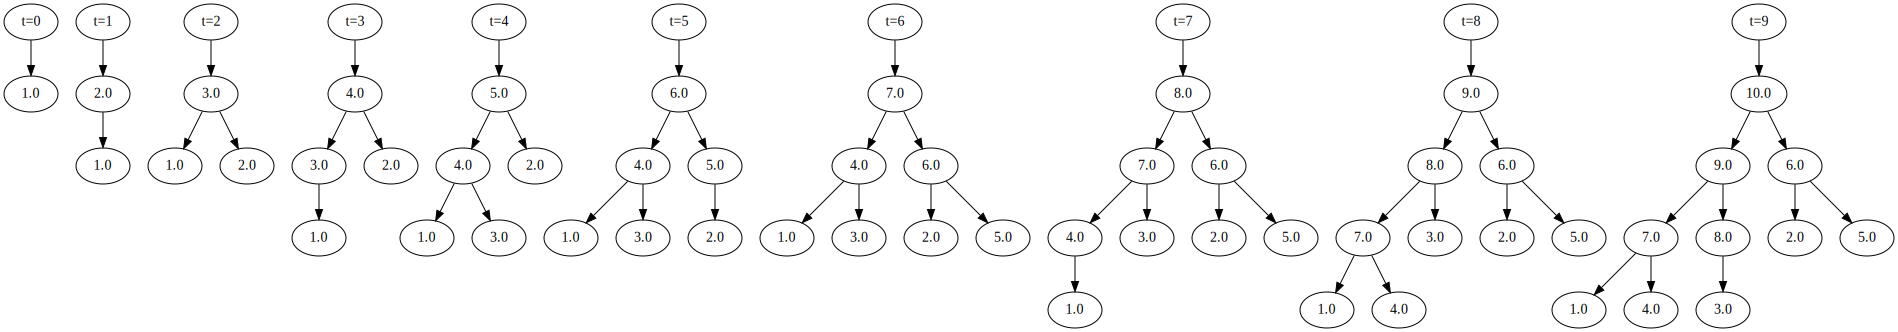

In [ ]:
a=Max_Heap(10,que_dibujar="inserciones y extracciones")
a.insert(1)
a.insert(2)
a.insert(3)
a.insert(4)
a.insert(5)
a.insert(6)
a.insert(7)
a.insert(8)
a.insert(9)
a.insert(10)
a.dibuja()

O uno puede dibujar el estado del heap después de cada movimiento de elemento (e.g. dentro de `hundir`):
En el ejemplo abajo, observen cómo el elemento "10" está insertado "abajo" del heap, y progresivamente sube en el árbol.

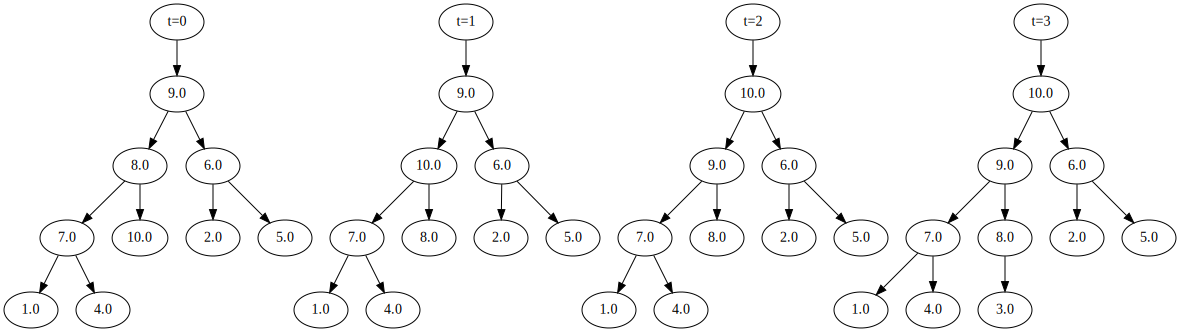

In [ ]:
a=Max_Heap(10,que_dibujar="nada")
a.insert(1)
a.insert(2)
a.insert(3)
a.insert(4)
a.insert(5)
a.insert(6)
a.insert(7)
a.insert(8)
a.insert(9)
a.que_dibujar = "todo"
a.insert(10)
a.dibuja()